In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output

In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [4]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/temp_0720/'
replicate='lc_nsms_20_6_14-19-2-2722-642861003/'
filename='MD_Cart_WDH.csv'
filepath=repository+replicate+filename
print('Filepath: ' + filepath)
AREPuckFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Puck/'+filename
AREPotatoFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Potato/'+filename
ARETricycleFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Tricycle/'+filename
oFile='sortedSpa.csv'

Filepath: /home/ebb505/ARE_Project/are-logs/temp_0720/lc_nsms_20_6_14-19-2-2722-642861003/MD_Cart_WDH.csv


In [5]:
# Import data from csv (evolved robots)
my_list = []
with open(filepath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_list.append(row[:-1]) # Last character is empty for some reason
# Import hand-made robots
my_robot = []
with open(AREPuckFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[:]) # Last character is empty for some reason        
with open(AREPotatoFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[:]) # Last character is empty for some reason        
with open(ARETricycleFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[:]) # Last character is empty for some reason        

In [6]:
# Estimate average for each generation
population = 25
evaluations = len(my_list)
#evaluations = 22000
featureSize = len(my_list[0])
generations = int(evaluations / population)

interval=25
rangeValues = range(0,evaluations,interval)
lenRange = len(rangeValues)

print("Number of evaluations: ", evaluations, "Features size: ", featureSize, "Generations: ", generations)
dat = np.array([[float(y) for y in x] for x in my_list]) # Convert to array
robotDat = np.array([[float(y) for y in x] for x in my_robot]) # Convert to array

Number of evaluations:  30025 Features size:  9 Generations:  1201


In [7]:
# Compare with hand-made robots
temRobot = []
for i in range(len(robotDat)):
    temDis = []
    temAve = []
    print(i/len(robotDat))
    for j in range(len(dat)):
        dist = np.linalg.norm(robotDat[i][1:]-dat[j][1:])
        temDis.append(dist)
        sortedList = np.sort(temDis)
        temAve.append(np.mean(sortedList[:14]))
    temRobot.append(temAve)
    
    clear_output(wait=True)

0.6666666666666666


In [9]:
# Compare ALL robot excluding hand-made robots
temAve = []
for i in range(len(dat)):
    temDis = []
    print(i/len(dat))
    for j in range(len(dat)):
        dist = np.linalg.norm(dat[i][1:]-dat[j][1:])
        temDis.append(dist)
    sortedList = np.sort(temDis)
    temAve.append(np.mean(sortedList[:14]))
    clear_output(wait=True)

0.9999666944213156


In [8]:
print(len(temAve))
print(len(temRobot[0]))

30025
30025


In [10]:
# Progress ALL robots
progressSparseness = []
progressAREPuck = []
progressAREPotato = []
progressARETricycle = []
for i in range(population,evaluations,population):
    progressSparseness.append(np.mean(temAve[:i]))
    progressAREPuck.append(temRobot[0][i])
    progressAREPotato.append(temRobot[1][i])
    progressARETricycle.append(temRobot[2][i])

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (1201).

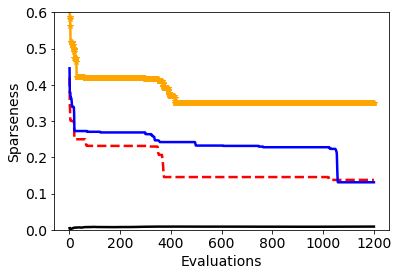

In [11]:
# Plot stuff
xValues = list(range(population, evaluations, population))
xValues = [x/population for x in xValues]
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

plt.plot(xValues, progressAREPuck, '-*', color='orange',  linewidth=2.5)
plt.plot(xValues, progressAREPotato, '--', color='red',  linewidth=2.5)
plt.plot(xValues, progressARETricycle, '-', color='blue',  linewidth=2.5)
plt.plot(xValues, progressSparseness, '-', color='black',  linewidth=2.5)

plt.xlabel('Evaluations')
plt.ylabel('Sparseness')

axes = plt.gca()
axes.set_ylim([0,0.6])

rangeX = range(0,lenRange*5000,5000) # Why are these offsets necessary?
posX = range(0,lenRange,200) # Why are these offsets necessary?
plt.xticks(posX,rangeX)
plt.legend(['ARE-Puck', 'ARE-Potato', 'ARE-Tricycle', 'Evolved robots'])
plt.title('Trait descriptor')

plt.savefig(repository+replicate+'TraitSparseness.png',dpi=200)

In [59]:
print(len(temAve))
print(temAve[0])

19400
0.0


In [12]:
myList = []
for i in range(len(temAve)):
    myList.append([i,temAve[i]])

def takeSecond(elem):
    return elem[1]

myList.sort(key=takeSecond, reverse=True)

In [13]:
print(len(myList))
print(myList[-5:])
#print([row[1] for row in myList])

30025
[[30017, 0.0], [30018, 0.0], [30020, 0.0], [30021, 0.0], [30023, 0.0]]


In [14]:
# Save to CSV
with open(repository + replicate + oFile, 'w', newline='') as write_obj:
    csv_writer = csv.writer(write_obj)
    for i in range(len(myList)):
        csv_writer.writerow(myList[i])

In [15]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

plt.plot([row[1] for row in myList], '-*', color='orange',  linewidth=2.5)
plt.xlabel('Evaluations')
plt.ylabel('Sparseness')
plt.title('Sorted evaluations')
plt.savefig(repository+replicate+'SortedEvaluations.png',dpi=200)